In [30]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 50
num_classes = 4
batch_size = 100
learning_rate = 0.001

In [31]:
# Define transform
transform = transforms.Compose(
                   [transforms.Resize((32,32)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [32]:
# Define training dataset/ test dataset loader
trainset = dset.ImageFolder(root="Simpsom_classification/train", transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True)

testset = dset.ImageFolder(root="Simpsom_classification/test",transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=10,
                                         shuffle=True)

In [33]:
# Define my dataset's classes
classes=('Homer Simpson', 'Ned Flanders', 'Moe Szyslak', 'Lisa Simpson')

In [34]:
# Define function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [35]:
# Define Convolutional Neural Network
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # Layer1
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, 3),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # Layer2
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, 3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        # FC layer1
        self.fc1 = nn.Sequential(
            nn.Linear(576, 120), nn.ReLU()
        )
        # FC layer2
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84), nn.ReLU()
        )
        # FC layer3
        self.fc3 = nn.Sequential(
            nn.Linear(84, 21), nn.ReLU()
        )
        # FC layer4 (final layer)
        self.fc4 = nn.Linear(21, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # flatten
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        return out

In [36]:
# Define my CNN model
model = CNNModel().to(device)
print(model)

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=576, out_features=120, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): ReLU()
  )
  (fc3): Sequential(
    (0): Linear(in_features=84, out_features=21, bias=True)
    (1): ReLU()
  )
  (fc4): Linear(in_features=21, out_features=4, bias=True)
)


In [37]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [38]:
# Train the model
print("Learning started!!!")
for epoch in range(num_epochs):
    avg_cost = 0
    for i, (images, labels) in enumerate(testloader):
        images = images.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute average cost
        avg_cost += loss.item() / batch_size

    if epoch % 10 == 0:
        print("Epoch [%d/%d] , Loss: %.8f" % (epoch+1, num_epochs, avg_cost))
print("Learning finished!!!")

Learning started!!!
Epoch [1/50] , Loss: 1.52102763
Epoch [11/50] , Loss: 0.20349664
Epoch [21/50] , Loss: 0.05973854
Epoch [31/50] , Loss: 0.09001597
Epoch [41/50] , Loss: 0.03009339
Learning finished!!!


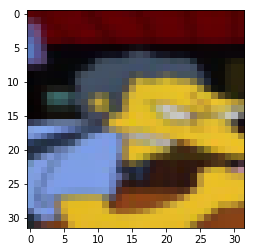

true label: Moe Szyslak
predicted label: Moe Szyslak


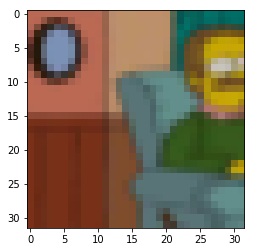

true label: Ned Flanders
predicted label: Ned Flanders


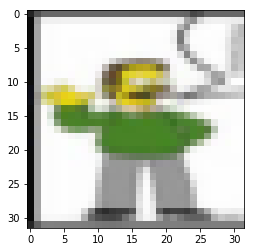

true label: Ned Flanders
predicted label: Ned Flanders


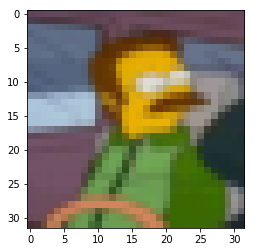

true label: Ned Flanders
predicted label: Ned Flanders


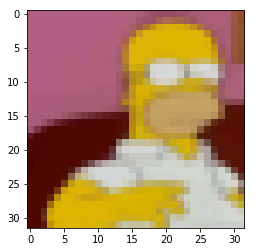

true label: Homer Simpson
predicted label: Homer Simpson

Num of correct predictions: 1184/1200
Test Accuracy: 98.667%


In [47]:
# Test the model
cnt = 0
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        
         # Prediction
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        cnt +=1
        if cnt < 6:
            # show one image
            img = images[5].cpu()
            imshow(img)
            label = labels[5]
            print('true label:', classes[label.item()])     
            print('predicted label:', classes[predicted[5].item()])
        
        # Compute accuracy
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print("\nNum of correct predictions: %d/%d" % (correct, total))
    print("Test Accuracy: %.3f%%" %(100*(float(correct)) / total))